## **<ins><center>MGF TUTORIAL</center></ins>**

This notebook provides a basic overview and information on how to use the MGF low resolution *cdf* files to create plots of the magnetic field values and residuals, as well as a spectrogram from the high-resolution MGF data. 

### <ins>Table of Contents</ins>
* [About MGF](#about-mgf)
* [Prerequisites](#prerequisites)
* [How the files are stored](#how-the-files-are-stored)
* [Tutorials](#tutorials)
    1. [Reading the daily MGF LR cdf files](#reading-mgf-lr-cdf-files)
    2. [Converting discrete timevalues into continous ranges](#converting-discrete-timevalues-into-continous-ranges)
    3. [Plotting the Measured Magnetic Field as a function of time](#plotting-the-measured-magnetic-field-as-a-function-of-time)
    4. [Plotting Model Field as a function of time](#plotting-model-field-as-a-function-of-time)
    5. [Plotting a Spectrogram](#plotting-a-spectrogram)

<a id="about-mgf"></a>

### <ins>About MGF</ins>

The Magnetic Field instrument (MGF) measures the local magnetic field onboard the Enhanced Polar Outflow Probe (e-POP) satellite by using two ring-core fluxgate sensors to characterize and remove the stray spacecraft field. The fluxgate sensors have their heritage in hte MAGSAT design, are double wound for reduced mass and cross-field dependence, and are mounted on a modest 0.9 m carbon-fiber boom. The MGF samples the magnetic field 160 times per sec (~ 50 metres) to a resolution of 0.0625 nT and outputs data at 1952 bytes per second including temperature measurements. Its power consumption is 2.2 watts, and its noise level is 7 pT per root Hz at 1 Hz. 

<a id="prerequisites"></a>

### <ins>Prerequisites</ins>

1. This tutorial assumes you have some basic understanding of Python and its terminology.

2. You will be required to install the following libraries in your python environment:
    *  __[cdflib](https://pypi.org/project/cdflib/)__
    *  __[matplotlib](https://matplotlib.org/stable/users/installing/index.html)__
    *  __[numpy](https://numpy.org/install/)__
    *  __[pandas](https://pandas.pydata.org/docs/getting_started/install.html)__

3. To plot the spectrogram, you will be required to have some background in Fast Fourier Transform and how to remove noise from digital signals.

<a id="how-the-files-are-stored"></a>

### <ins>How the files are stored</ins>

The MGF lv1b LR CDF Product is a daily product, providing MGF magnetic field data and associated parameters at 1 Hz. The Common Data Format (CDF) file is written to the International Solar-Terrestrial Physics (ISTP) standard. The CDF file contains the following fields:

* Attribute:	Definition
* CalInboard:	Inboard sensor 3×4 calibration matrix
* CalOutboard:	Outboard sensor 3×4 calibration matrix
* Timestamp:	Time of observation (UTC, represented as CDF epoch in milliseconds since year zero)
* SyncStatus:	Time synchronization status, source and quality
* Latitude:	CASSIOPE position in ITRF – Geocentric latitude (deg)
* Longitude:	CASSIOPE position in ITRF – Geocentric longitude (deg)
* Radius:	CASSIOPE position in ITRF – Geocentric Radius (m)
* B_inboard_CRF:	Inboard sensor magnetic field vector, CRF (spacecraft) frame (nT)
* label_B_inbrd:	Component label inboard CRF
* B_outboard_CRF:	Outboard sensor magnetic field vector, CRF (spacecraft) frame (nT)
* label_B_outbrd:	Component label outboard CRF
* B_CRF:	Magnetic field vector, CRF (spacecraft) frame (nT), ignore if q_Flags >= 128
* label_B_CRF:	Component label CRF
* B_NEC_Out:	Magnetic field vector, NEC frame (nT), NaN if Flags_B >= 128
* label_B_NEC:	Component label NEC
* B_model_NEC:	CHAOS Model magnetic field vector, NEC frame (nT)
* label_model:	Component label NEC
* dB_other:	Magnetic stray field correction vector of all sources, CRF (spacecraft) frame (nT)
* B_error_In:	B component error estimates for Inboard sensor, CRF frame (nT)
* label_B_err_In:	Component label CRF
* B_error_Out:	B component error estimates for outboard sensor, CRF frame (nT)
* label_B_err_Out:	Component label CRF
* q_NEC_CRF:	Quaternion transformation: NEC <– CRF, scalar last
* Att_error:	Error estimates on attitude information (mdeg)
* Flags_B:	Bit flags for measurement issues:
    * 0 = no flagged issues
    * 4 = clipped measurement replaced with interpolated value
    * 64 = padding around active magnetotorquer times
    * 128 = torquer command active
* Flags_q:	Bit flags for attitude information:
    * 0 = no flagged issues
    * 1 = padding around rotations above 0.030 deg/sec
    * 2 = spacecraft rotating more than 0.030 deg/sec
    * 16 = padding for missing definitive attitude
    * 32 = missing definitive attitude solution
* Flags_Platform:	Error flags for Spacecraft platform
    * 0 = no issues

<a id="tutorials"></a>

## **<ins><center>Tutorials</center></ins>**

<a id="reading-mgf-lr-cdf-files"></a>

#### <ins>Reading the daily MGF LR cdf files</ins>

To read the MGF LR files, we would use the functionality of *cdflib* package. Here we are using the file from __[2018/09/10](https://epop-data.phys.ucalgary.ca/2018/09/10/MGF/SW_OPER_MAGE_LR_1B_20180910T000000_20180910T235959_0202_MDR_MAG_LR.cdf)__, but the process would work the same for any other file. 

Note : The filepath string is divided into a multiline for better readability.

In [1]:
import cdflib as cdf                #to work with cdf files

#reading the cdf file 
cdf_file = cdf.CDF("SW_OPER_MAGE_LR_1B_"
                   "20180910T000000_20180910T235959_0202_MDR_MAG_LR.cdf")

#printing the information of the cdf file 
print(cdf_file.cdf_info())

CDFInfo(CDF=WindowsPath('D:/comm_soft_tools/python_codes/tutorials/MGF_tutorial/SW_OPER_MAGE_LR_1B_20180910T000000_20180910T235959_0202_MDR_MAG_LR.cdf'), Version='3.8.0', Encoding=6, Majority='Row_major', rVariables=[], zVariables=['CalInboard', 'CalOutboard', 'Timestamp', 'SyncStatus', 'Latitude', 'Longitude', 'Radius', 'B_inboard_CRF', 'label_B_inbrd', 'B_outboard_CRF', 'label_B_outbrd', 'B_CRF', 'label_B_CRF', 'B_NEC_Out', 'label_B_NEC', 'B_model_NEC', 'label_model', 'dB_other', 'B_error_In', 'label_B_error_In', 'B_error_Out', 'label_B_error_Out', 'q_NEC_CRF', 'Att_error', 'Flags_B', 'Flags_q', 'Flags_Platform', 'label_q_NEC_CRF'], Attributes=[{'Abs_Orbit_Start': 'Global'}, {'Abs_Orbit_Stop': 'Global'}, {'CHAOS_Core_End': 'Global'}, {'CHAOS_RC_End': 'Global'}, {'CHAOS_Valid_Core': 'Global'}, {'CHAOS_Version': 'Global'}, {'CREATOR': 'Global'}, {'CalFilter_Attitude_max_sec': 'Global'}, {'CalFilter_MaxRot_deg_per_sec': 'Global'}, {'CalFilter_Min_Attitude_Src': 'Global'}, {'CalFilter_To

The above code successfully reads the *cdf* file and stores the information to *cdf_file* object. All the data values which will be required to plot the graphs are stored in the *zvariables* section of the file.

Now, we need to copy the all the required values to python objects and create a dataframe for easier plotting. 

**NOTE:** The timestamp values are not in UTC format, so we will require to convert them to the same. 

In [2]:
import pandas as pd

#getting the timestamp values 
timestamps = cdf_file.varget("Timestamp")
#converting CDF epoch values to UTC

timestamps = cdf.cdfepoch.to_datetime(timestamps)


#Outboard magnetic field 
B_NEC_out = cdf_file.varget("B_NEC_out")
#dividing B_NEC_out to x,y,z components
B_North_Out = [x for x,_,_ in B_NEC_out] 
B_East_Out = [x for _,x,_ in B_NEC_out] 
B_Center_Out = [x for _,_,x in B_NEC_out] 


#magnetic field vector
B_model_NEC = cdf_file.varget("B_model_NEC")
#dividing B_CRF to x,y,z components
B_North_model = [x for x,_,_ in B_model_NEC] 
B_East_model = [x for _,x,_ in B_model_NEC] 
B_Center_model = [x for _,_,x in B_model_NEC]


#Model Residual 
B_North_res = [B_North_model[i]-B_North_Out[i] for i in range(len(B_North_model))]
B_East_res = [B_East_model[i]-B_East_Out[i] for i in range(len(B_East_model))]
B_Center_res = [B_Center_model[i]-B_Center_Out[i] for i in range(len(B_Center_model))]

#flags
q_flags = cdf_file.varget("Flags_q")
B_flags = cdf_file.varget("Flags_B")


#converting all the above information to a dataframe
MGF_dict = {"UTC": timestamps,
            "B_North_Out": B_North_Out,
            "B_East_Out": B_East_Out,
            "B_Center_Out": B_Center_Out,
            "B_North_model": B_North_model,
            "B_East_model": B_East_model,
            "B_Center_model": B_Center_model,
            "B_North_res": B_North_res,
            "B_East_res": B_East_res,
            "B_Center_res": B_Center_res,
            "q_flags": q_flags,
            "B_flags": B_flags 
            }

#converting the dictionary to a dataframe
MGF_df = pd.DataFrame(MGF_dict)

print(MGF_df.head())

                  UTC   B_North_Out  B_East_Out  B_Center_Out  B_North_model  \
0 2018-09-10 00:00:01  13132.196627  569.224765  36989.210492   13131.919762   
1 2018-09-10 00:00:02  13159.345845  567.441093  36958.973211   13156.082489   
2 2018-09-10 00:00:03  13169.263747  565.430342  36935.619129   13180.238783   
3 2018-09-10 00:00:04  13194.034381  562.263768  36906.328070   13204.388531   
4 2018-09-10 00:00:05  13219.565469  558.223254  36876.076137   13228.531585   

   B_East_model  B_Center_model  B_North_res  B_East_res  B_Center_res  \
0    567.568489    36985.333302    -0.276865   -1.656276     -3.877190   
1    564.558965    36956.118742    -3.263356   -2.882128     -2.854469   
2    561.554117    36926.836595    10.975036   -3.876225     -8.782534   
3    558.553952    36897.486946    10.354151   -3.709816     -8.841123   
4    555.558477    36868.069853     8.966116   -2.664778     -8.006284   

   q_flags  B_flags  
0        0        0  
1        0        0  
2       

The above code transferred all the useful information to a dataframe called *MGF_df*.

<a id="converting-discrete-timevalues-into-continous-ranges"></a>

#### <ins>Converting discrete timevalues into continous range</ins>


Before any plotting, we will need to convert *MGF_df* into discrete chunks with continous time values such that we have no empty values on the plot. The following code snippet does the same and deletes values where the starting and the ending time is the same. 

In [3]:
#making a list of dataframes with continuous timestamps                                
MGF_lists = [g for k,g in 
             MGF_df.groupby((~(MGF_df.UTC.diff()
                               .dt.total_seconds().fillna(0)<15)).cumsum())]


#loop to delete list elements which have the same starting and ending times 
i = 0
len_MGF = len(MGF_lists)
while i<len_MGF:

    if MGF_lists[i]["UTC"].iloc[0]==MGF_lists[i]["UTC"].iloc[-1]:
        print("Deleted: {}".format(MGF_lists[i]["UTC"].iloc[0]))
        del MGF_lists[i]
        i-=1
        len_MGF-=1
    i+=1

print("\n")

#loop which would display the starting and ending time range 
for i in range(len(MGF_lists)):
    print("Starting Time: {} Ending Time: {}"
          .format(MGF_lists[i]["UTC"].iloc[0], MGF_lists[i]["UTC"].iloc[-1]))

print("\nNumber of continous UTCs in cdf: {}".format(len(MGF_lists)))


Deleted: 2018-09-10 00:29:24.500000
Deleted: 2018-09-10 01:45:23
Deleted: 2018-09-10 04:29:21.500000
Deleted: 2018-09-10 09:09:23.500000
Deleted: 2018-09-10 16:24:09.500000
Deleted: 2018-09-10 20:14:37.500000
Deleted: 2018-09-10 22:11:23.500000


Starting Time: 2018-09-10 00:00:01 Ending Time: 2018-09-10 00:23:03
Starting Time: 2018-09-10 00:35:46 Ending Time: 2018-09-10 01:39:03
Starting Time: 2018-09-10 01:51:43 Ending Time: 2018-09-10 03:35:03
Starting Time: 2018-09-10 05:23:40 Ending Time: 2018-09-10 07:07:03
Starting Time: 2018-09-10 11:11:44 Ending Time: 2018-09-10 12:55:03
Starting Time: 2018-09-10 19:53:16 Ending Time: 2018-09-10 20:07:33
Starting Time: 2018-09-10 20:21:42 Ending Time: 2018-09-10 22:05:03
Starting Time: 2018-09-10 22:17:44 Ending Time: 2018-09-10 23:46:03

Number of continous UTCs in cdf: 8


The first line of the above code creates a list of dataframes which have their time difference values less than 15 seconds. Then, we use a *while* loop to delete the values which have the same starting and ending timestamps. All this is done to make sure that when we plot, we do not have any empty ranges on the graph. 

<a id="plotting-the-measured-magnetic-field-as-a-function-of-time"></a>

#### <ins>Plotting the Inboard Magnetic Field as a function of time</ins>

To plot the Outboard Magnetic Field as a function of time, in North-East-Center coordinates we will be using the functionality of *matplotlib* and the values stored under *MGF_df*'s *B_NEC_Out* component columns.  

To create different plots for different time ranges, we will be using a *for* loop that would go over each dataframe stored in *MGF_list* and plot the values of Inboard Magnetic Field as a function of time. The following code illustrates the same:

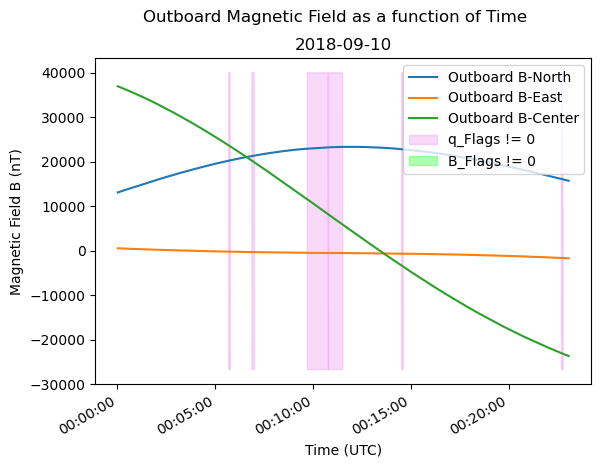

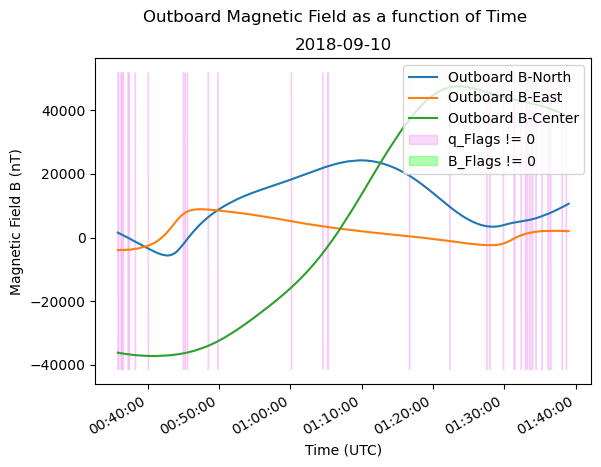

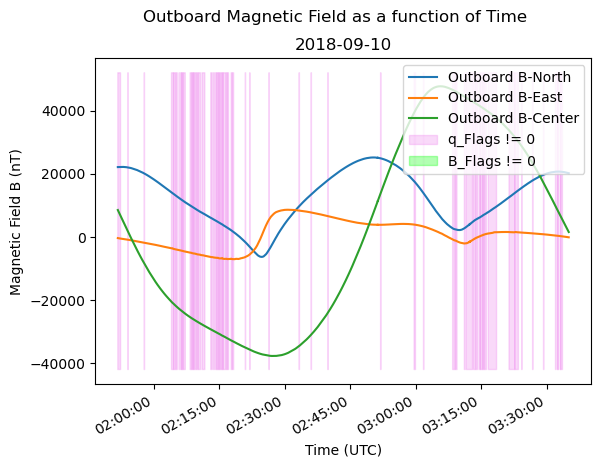

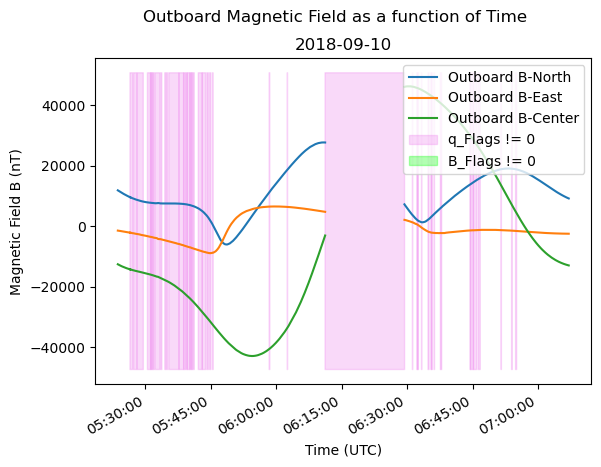

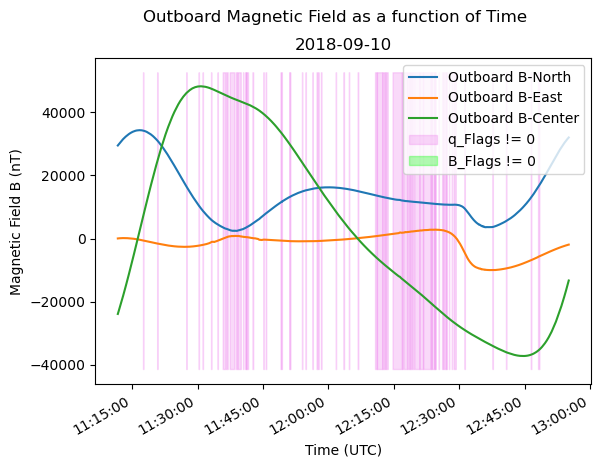

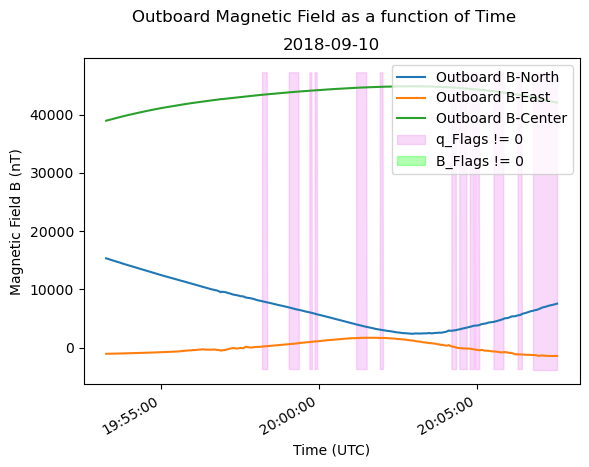

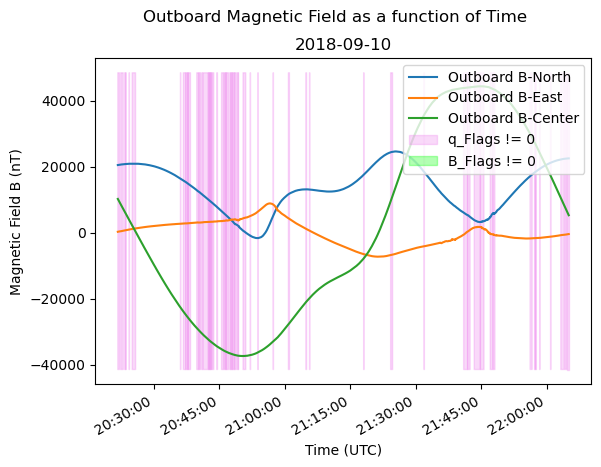

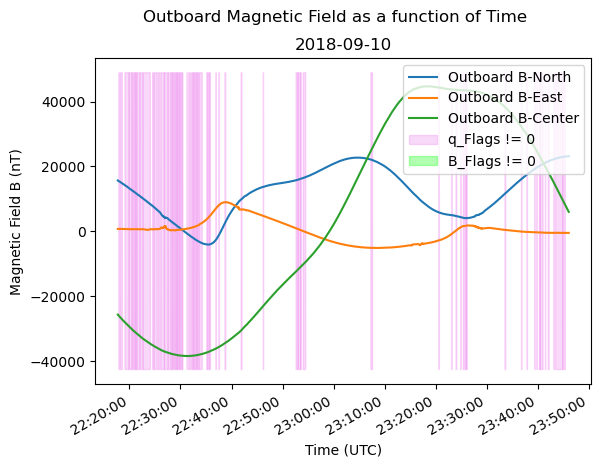

In [4]:
import matplotlib.pyplot as plt         #to plot the graph
import matplotlib.dates as mdates       #to format date on x-axis 

for i in range(len(MGF_lists)):

    #plotting the components of Inboard Magnetic Field 
    plt.plot(MGF_lists[i]["UTC"],
             MGF_lists[i]["B_North_Out"], 
             label="Outboard B-North")
    plt.plot(MGF_lists[i]["UTC"],
             MGF_lists[i]["B_East_Out"], 
             label="Outboard B-East")
    plt.plot(MGF_lists[i]["UTC"],
             MGF_lists[i]["B_Center_Out"], 
             label="Outboard B-Center")
    
    
    #shading the plot where q_flag and B_flags is non-zero
    y_lim = plt.gca().get_ylim()        #minimum and maximum value of y axis

    plt.fill_between(MGF_lists[i]["UTC"], y_lim[0], y_lim[-1],
                     where=(MGF_lists[i]["q_flags"]!=0), interpolate=True,
                 alpha=0.3, label="q_Flags != 0", color="violet")
    
    plt.fill_between(MGF_lists[i]["UTC"], y_lim[0], y_lim[-1],
                     where=(MGF_lists[i]["B_flags"]!=0), interpolate=True,
                 alpha=0.3, label="B_Flags != 0", color="lime")
    

    #formatting x-axis to show correct timestamps
    plt.gcf().autofmt_xdate()                                       
    myfmt = mdates.DateFormatter("%H:%M:%S")                     
    plt.gca().xaxis.set_major_formatter(myfmt) 


    #formatting the entire plot
    plt.legend(loc="upper right")
    plt.suptitle("Outboard Magnetic Field as a function of Time")
    plt.title(MGF_lists[i]["UTC"].dt.date.iloc[0])
    plt.xlabel("Time (UTC)")
    plt.ylabel("Magnetic Field B (nT)")

    plt.show()

The above code uses a loop to access each element from *MGF_lists* and plots the Measured Magnetic Field as a function of time. We also end up shading regions of the plot where either *q_flags* or *B_flags* are not zero. 

<a id="plotting-model-field-as-a-function-of-time"></a>

### <ins>Plotting Model Field as a function of time</ins>

To plot the Model field as a function of time, we repeat the same process as before but for the components of *B_model_NEC*.

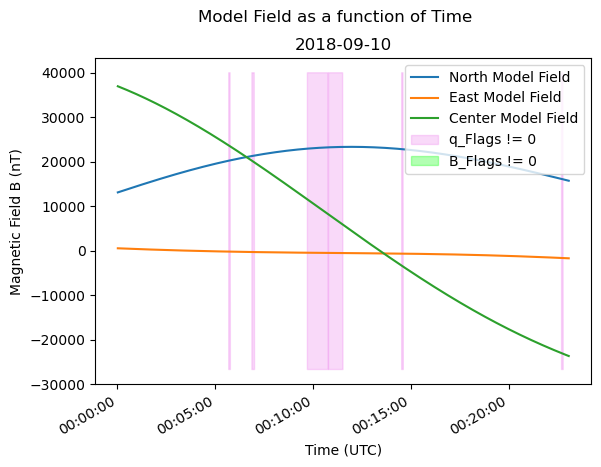

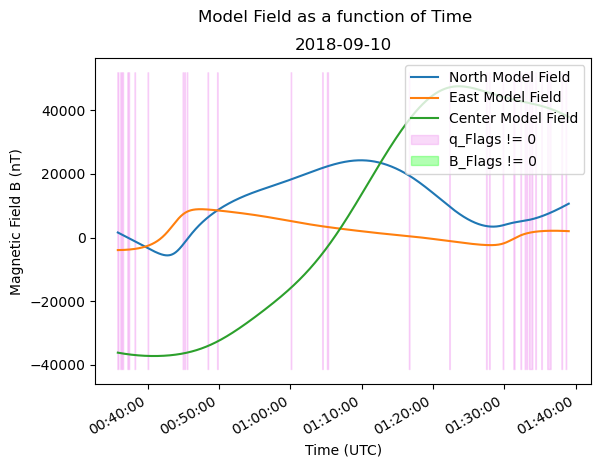

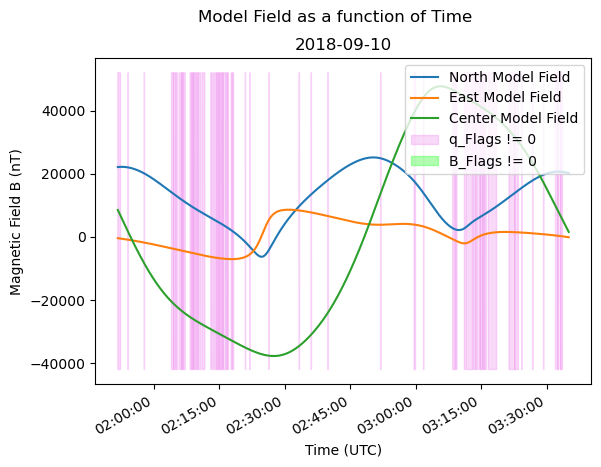

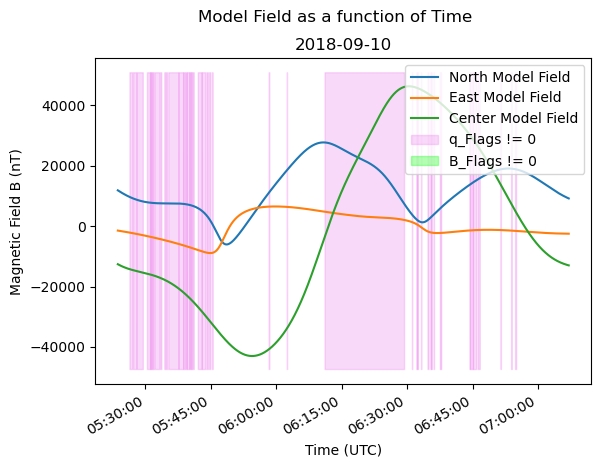

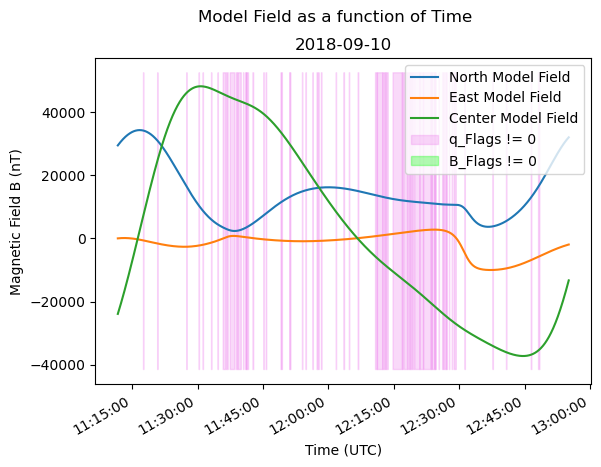

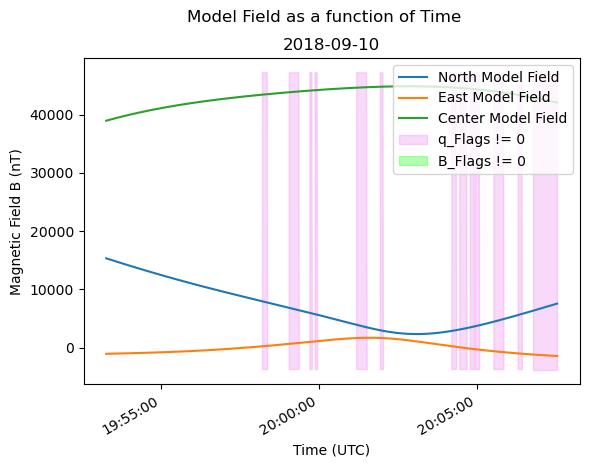

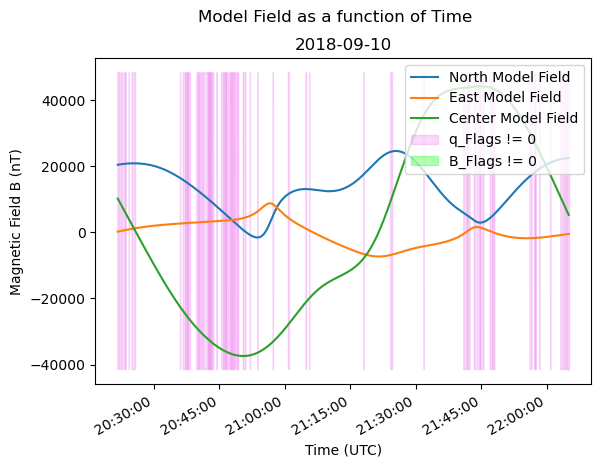

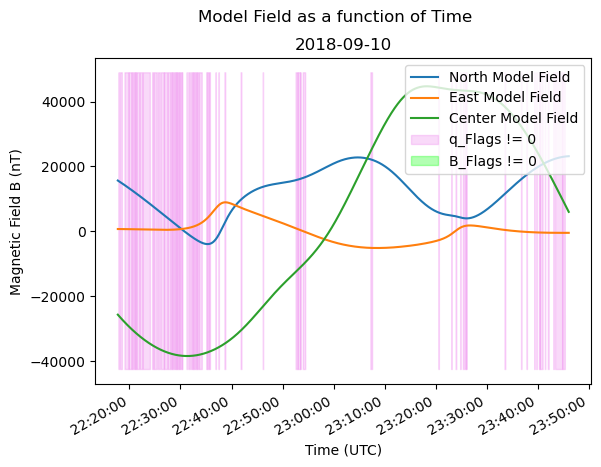

In [5]:
for i in range(len(MGF_lists)):

    #plotting the components of Magnetic Model Field 
    plt.plot(MGF_lists[i]["UTC"],
             MGF_lists[i]["B_North_model"], 
             label="North Model Field")
    plt.plot(MGF_lists[i]["UTC"],
             MGF_lists[i]["B_East_model"], 
             label="East Model Field")
    plt.plot(MGF_lists[i]["UTC"],
             MGF_lists[i]["B_Center_model"], 
             label="Center Model Field")
    
    
    #shading the plot where q_flag and B_flags is non-zero
    y_lim = plt.gca().get_ylim()        #minimum and maximum value of y axis

    plt.fill_between(MGF_lists[i]["UTC"], y_lim[0], y_lim[-1],
                     where=(MGF_lists[i]["q_flags"]!=0), interpolate=True,
                 alpha=0.3, label="q_Flags != 0", color="violet")
    
    plt.fill_between(MGF_lists[i]["UTC"], y_lim[0], y_lim[-1],
                     where=(MGF_lists[i]["B_flags"]!=0), interpolate=True,
                 alpha=0.3, label="B_Flags != 0", color="lime")
    

    #formatting x-axis to show correct timestamps
    plt.gcf().autofmt_xdate()                                       
    myfmt = mdates.DateFormatter("%H:%M:%S")                     
    plt.gca().xaxis.set_major_formatter(myfmt) 


    #formatting the entire plot
    plt.legend(loc="upper right")
    plt.suptitle("Model Field as a function of Time")
    plt.title(MGF_lists[i]["UTC"].dt.date.iloc[0])
    plt.xlabel("Time (UTC)")
    plt.ylabel("Magnetic Field B (nT)")

    plt.show()

<a id="plotting-measured-model-field-residual"></a>

### <ins>Plotting Measured-Model Field residual as a function of time 

Once again, we repeat the exact process as before but for the components of *B_residual_CRF*. 

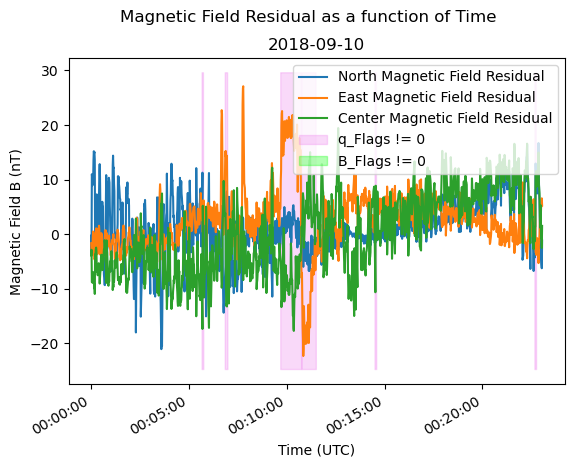

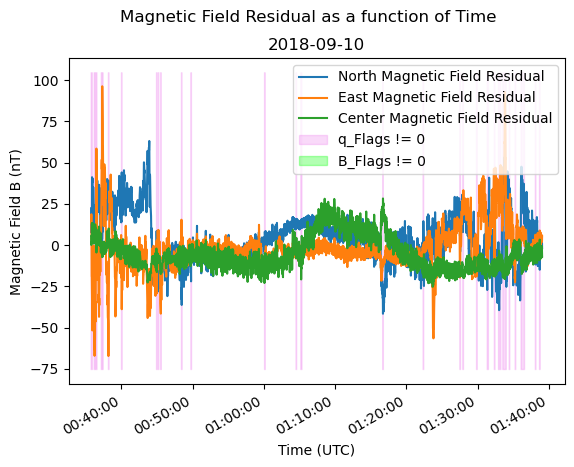

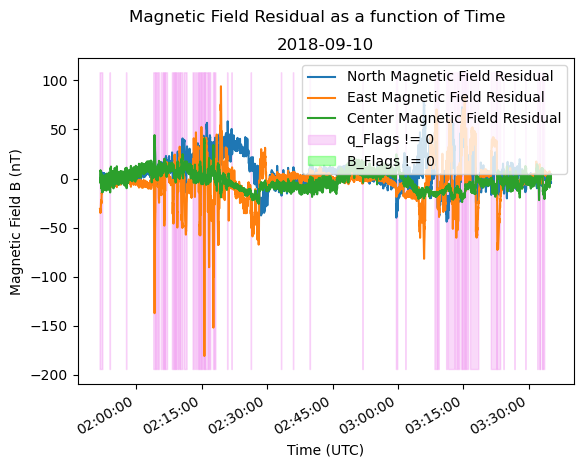

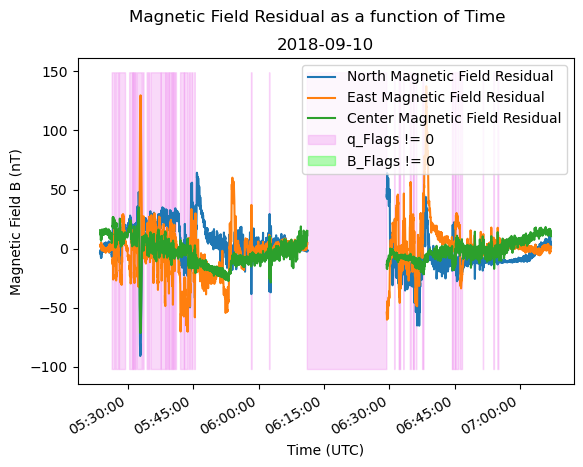

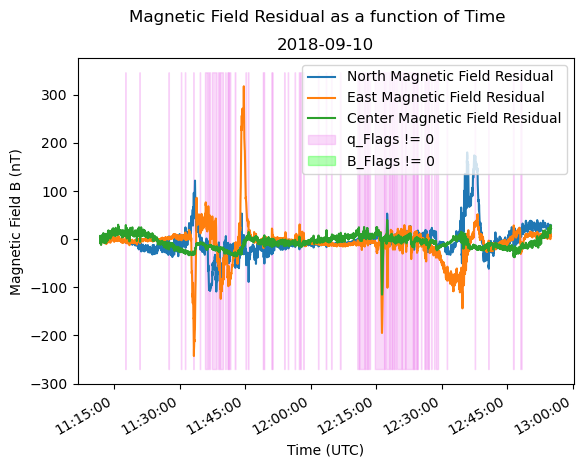

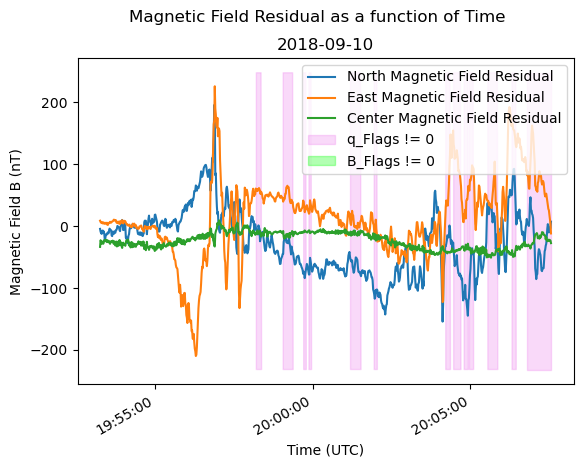

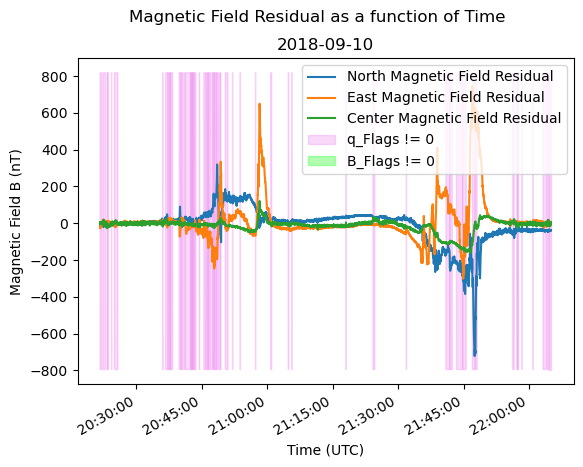

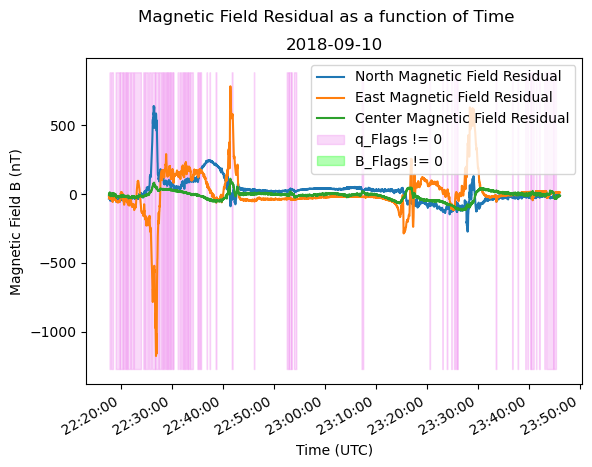

In [6]:
for i in range(len(MGF_lists)):

    #plotting the Redidual Magnetic Field 
    plt.plot(MGF_lists[i]["UTC"],
             MGF_lists[i]["B_North_res"], 
             label="North Magnetic Field Residual")
    plt.plot(MGF_lists[i]["UTC"],
             MGF_lists[i]["B_East_res"], 
             label="East Magnetic Field Residual")
    plt.plot(MGF_lists[i]["UTC"],
             MGF_lists[i]["B_Center_res"], 
             label="Center Magnetic Field Residual")
    
    
    #shading the plot where q_flag and B_flags is non-zero
    y_lim = plt.gca().get_ylim()        #minimum and maximum value of y axis

    plt.fill_between(MGF_lists[i]["UTC"], y_lim[0], y_lim[-1],
                     where=(MGF_lists[i]["q_flags"]!=0), interpolate=True,
                 alpha=0.3, label="q_Flags != 0", color="violet")
    
    plt.fill_between(MGF_lists[i]["UTC"], y_lim[0], y_lim[-1],
                     where=(MGF_lists[i]["B_flags"]!=0), interpolate=True,
                 alpha=0.3, label="B_Flags != 0", color="lime")
    

    #formatting x-axis to show correct timestamps
    plt.gcf().autofmt_xdate()                                       
    myfmt = mdates.DateFormatter("%H:%M:%S")                     
    plt.gca().xaxis.set_major_formatter(myfmt) 


    #formatting the entire plot
    plt.legend(loc="upper right")
    plt.suptitle("Magnetic Field Residual as a function of Time")
    plt.title(MGF_lists[i]["UTC"].dt.date.iloc[0])
    plt.xlabel("Time (UTC)")
    plt.ylabel("Magnetic Field B (nT)")

    plt.show()

<a id="plotting-a-spectrogram"></a>

### <ins>Plotting a Spectrogram</ins>

A spectrogram is like a photograph or image of a signal, it shows the frequency spectrum of a signal over the course of time. The fundamental intuition behind a spectrogram is the concept of transforming time-domain data into the frequency domain to uncover additional insights. It provides a two-dimensional representation of a signal, where one axis represents time, the other represents frequency, and the color or intensity represents the magntiude of the signal at each frequency and time. This means we can read the spectrogram as a series of vertical slices, each representing the frequency content of the signal at a specific moment in time. 

To plot a spectrogram similar to the one posted on e-POP website, we will need to work with *HR* file from __[2018/09/10](https://epop-data.phys.ucalgary.ca/2018/09/10/MGF/SW_OPER_MAGE_HR_1B_20180910T000000_20180910T235959_0202_MDR_MAG_HR.cdf)__ as they have a Sampling Frequency of 160 Hz compared to a Sampling Frequency of 1 Hz for *LR* files. The process for plotting a spectrogram will be a bit different compared to what we have done until now.  

Below are the steps required to create MGF inboard and outboard spectrogram:

1. Import all the necessary modules

In [7]:
import cdflib as cdf                #for cdf files
import pandas as pd                 #for dataframes
import numpy as np                  
from scipy import signal            #to remove linearites 
import matplotlib.pyplot as plt     #to display plots
import matplotlib.dates as mdates   #format dates on plot

2. Open cdf file and copy the necessary variables i.e. Timestamp, B_inboard_CRF and B_outboard_CRF. 

Note: The filepath is divided into a multiline string for better readability. 

In [8]:
#opening cdf file
cdf_file = cdf.CDF("SW_OPER_MAGE_HR_1B_20180910T000000_"
                   "20180910T235959_0202_MDR_MAG_HR.cdf")

#copying timestamp, b_inboard_crf and b_outboard_crf from cdf
timestamps = cdf_file.varget("Timestamp")
B_inboard_CRF = cdf_file.varget("B_inboard_CRF")
B_outboard_CRF = cdf_file.varget("B_outboard_CRF")

3. B_inboard_CRF and B_outboard_CRF contain non finite values which need to replaced with 0's,otherwise the spectrogram functions won't work properly. 

In [9]:
#replacing all non finite values with 0 within b_inboard and b_outward
np.nan_to_num(B_inboard_CRF, copy=False, nan=0.0, posinf=0.0, neginf=0.0)
np.nan_to_num(B_outboard_CRF, copy=False, nan=0.0, posinf=0.0, neginf=0.0)

array([[-12820.74378175,  -3676.90446359,  36942.97563729],
       [-12820.63440499,  -3676.45441524,  36943.1336241 ],
       [-12820.94325464,  -3676.54936801,  36942.65922552],
       ...,
       [-22898.43658658,  -3204.6189132 ,   6215.89281525],
       [-22898.11183617,  -3204.93534213,   6215.61177372],
       [-22897.93251509,  -3204.68198703,   6215.54107282]])

4. Create a pandas dataframe with timestamps, B_Inboard_CRF and B_Outboard_CRF.

In [10]:
#a dictionary to contain values which will be transformed to dataframe
MGF_dict = {"timestamps":timestamps,
            "B_inboard_CRF":B_inboard_CRF.tolist(),
            "B_outboard_CRF":B_outboard_CRF.tolist()}

#creating a dataframe
MGF_df = pd.DataFrame(MGF_dict)

print(MGF_df.head())

     timestamps                                      B_inboard_CRF  \
0  6.370376e+13  [-12823.071875860693, -3675.521194137363, 3694...   
1  6.370376e+13  [-12823.00970429547, -3675.5271523958077, 3694...   
2  6.370376e+13  [-12823.014864012282, -3675.410149325728, 3694...   
3  6.370376e+13  [-12823.08219529432, -3675.287187997202, 36944...   
4  6.370376e+13  [-12823.089549180228, -3675.098889606709, 3694...   

                                      B_outboard_CRF  
0  [-12820.743781748159, -3676.904463587538, 3694...  
1  [-12820.634404992767, -3676.454415244555, 3694...  
2  [-12820.94325463854, -3676.5493680093673, 3694...  
3  [-12821.074619182727, -3676.368646975437, 3694...  
4  [-12820.75578102934, -3676.540509111959, 36942...  


Note that the timestamps are still in CDF epoch time and the B_inboard and B_outboard entries are lists. This is done to reduce runtime of the notebook.

5. We need to divide the dataframe into small chunks of timeframe where the data was continously gathered. Here, we divide the dataframe if two subsequent values of timestamps have a difference greater than 15. 

In [11]:
#a list of dataframes separated when value of timestamps > 15                           
MGF_lists = [g for k,g in 
             MGF_df.groupby((~(MGF_df.timestamps.diff().fillna(0)<15)).cumsum())]

i = 0
len_MGF = len(MGF_lists)

#loop to delete dataframes from list if they have the same starting and ending time 
while i<len_MGF:
    if MGF_lists[i]["timestamps"].iloc[0]==MGF_lists[i]["timestamps"].iloc[-1]:
        del MGF_lists[i]
        i-=1
        len_MGF-=1
    i+=1

print("Number of continous timestamps in cdf: {}".format(len(MGF_lists)))

Number of continous timestamps in cdf: 8


6. Code for Spectrogram: The code for creating a spectrogram requires two functions.

    * *Spectrogram* Function: This function is used to create the frequency bins, power spectral density and logarithmic spectrum density matrices.
    * *DiscreteFourier* Function: This function is used to calculate the Fourier Transform of our specific winodow size.

In [12]:
def DiscreteFourier(x, Fs):

    #noise bandwidth for hanning window
    NENBW = 1.5000                                      
    #frequency array of size (1-by-(half of window size)+1)
    freq = np.linspace(0, Fs/2, int(x.shape[0]/2)+1)    

    #number of elements to be used to calculate the hanning window
    N = int(x.shape[0])                                 
    #1D array of hanning window with size N
    window = np.hanning(N)                              
    #sum of the elements within hanning window
    s1 = sum(np.hanning(N))                             
    #equivalent noise bandwidth 
    ENBW= NENBW*Fs/N                                    

    #fourier transform after scaling original elements by hanning window 
    xdft = np.fft.fft(x*window)                         
    #ending index from where overlapping will start
    end_in = int(N/2+1)                                 
    #slicing the array where the overlapping window will start
    xdft = xdft[0:end_in]                               
    #calculating the magnitude of the power spectrum 
    ps = np.abs(xdft)**2                                
    #as we only have positive frequencies
    ps[1:-1] = 2*ps[1:-1]                               
    #normalizing power spectrum
    ps = ps/(s1**2)                                     
    #density of power spectrum                
    psd = ps/ENBW                                       
    lsd = np.sqrt(psd)
    ls = np.sqrt(ps)
    
    ps = np.transpose(ps)
    psd = np.transpose(psd)
    ls = np.transpose(ls)
    lsd = np.transpose(lsd)
   
   
    return psd, ps, lsd, ls, ENBW, freq

In [13]:
def spectrogram(x, t, nfft, overlap, Fs):

    n = int(np.floor((len(x) - (nfft-overlap))/overlap))
    #converting magnetic field column values to numpy array
    x = x.to_numpy()                        
    #converting timestamp values to float 64
    t = t.astype(np.float64)                
    nfftPost = int(nfft/2+1)
    
    #array for storing frequency bins
    f = np.zeros((1, nfftPost))             
    #array for storing power spectrum density 
    psd = np.zeros((n,nfftPost))            
    #array for storing power spectrum 
    ps = np.zeros((n,nfftPost))             
    lsd = np.zeros((n,nfftPost))
    ls = np.zeros((n,nfftPost))
    #equivalent noise bandwidth
    ENBW = 0                                
    #list to contain average time values 
    time = []                               

    #loop to go over all windows 
    for i in range(0, n):
        #starting index of array where it should be sliced 
        start_in = int((1+(i-1))*overlap)   
        #ending index of array where it should be sliced 
        end_in = int((i*overlap)+(nfft))    

        #slicing magentic field array according to window size 
        y = x[start_in:end_in]              

        #removing linear trends from the window of magnetic field 
        z = signal.detrend(y)               

        psd[i,:], ps[i,:], lsd[i,:], ls[i,:], ENBW, f = DiscreteFourier(z, Fs)

        #slicing timestamp array 
        temp = t[start_in:end_in]           

        #taking average of timestamp array as its still in CDF epoch format
        temp = np.average(temp)             

        #appending time to its list 
        time.append(temp)                   

    #converting CDF epochs to datetime 
    time=cdf.cdfepoch.to_datetime(time)

    return f, time, psd, ps, lsd, ls, ENBW

7. Creating Outboard Spectrogram 

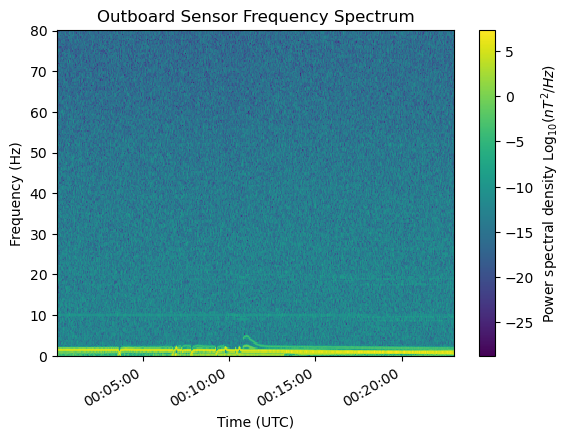

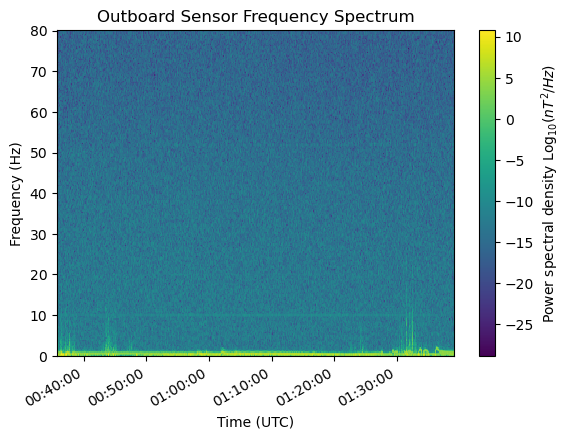

C:\Users\kain\AppData\Local\Temp\ipykernel_4712\1917288213.py:34: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(TX, FX, 10*np.log10(np.sqrt(np.abs(PO))))


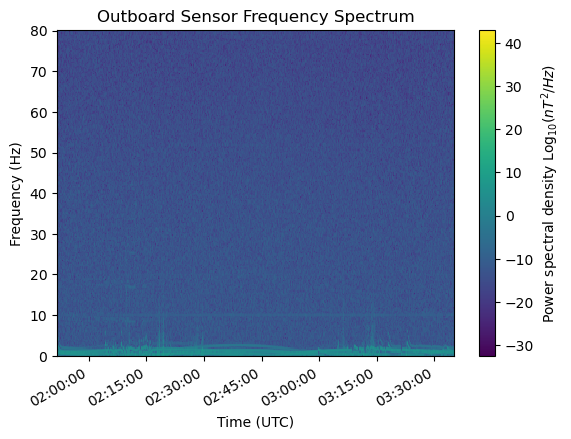

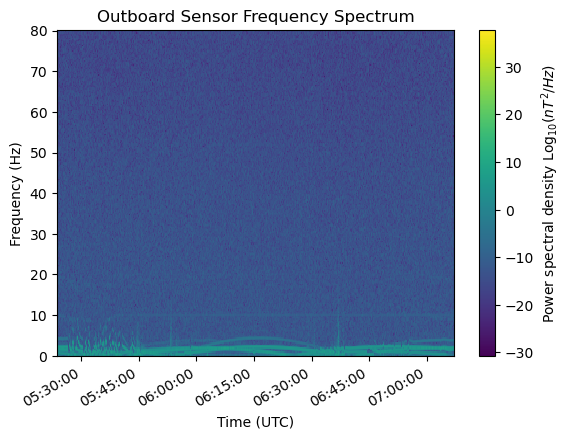

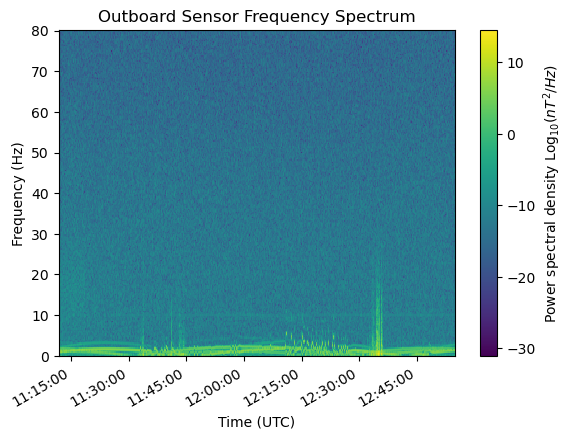

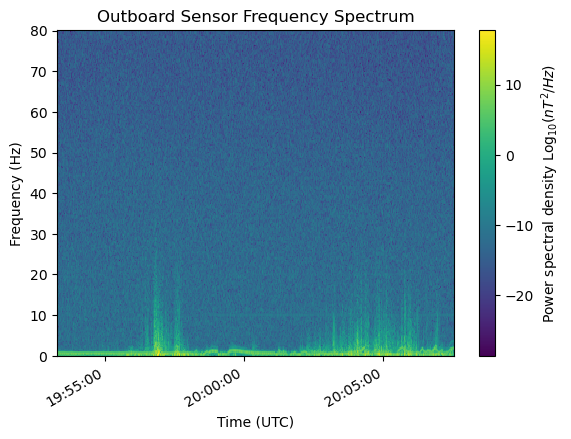

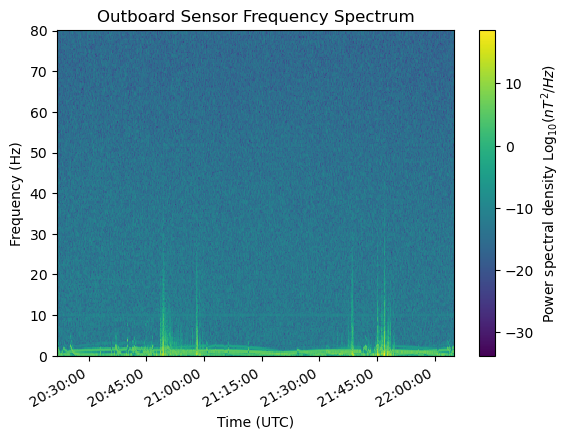

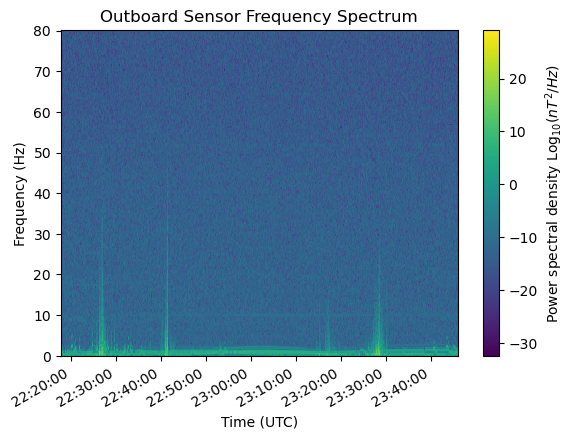

In [14]:
#window size for computing spectrogram 
nfft = 512                              
#overlap between subsequent windows
overlap = 256                           
#sampling frequency rate of MGF
Fs = 160                                

#for outboard spectrum                                                                  
for i in range(len(MGF_lists)):
    FX,TX,PSDX,PSX,LSDX,LSX,ENBWX=spectrogram(MGF_lists[i]["B_outboard_CRF"].str[0],
                                                        MGF_lists[i]["timestamps"],
                                                        nfft,
                                                        overlap,
                                                        Fs)


    FY,TY,PSDY,PSY,LSDY,LSY,ENBWY=spectrogram(MGF_lists[i]["B_outboard_CRF"].str[1],
                                                        MGF_lists[i]["timestamps"],
                                                        nfft,
                                                        overlap,
                                                        Fs)


    FZ,TZ,PSDZ,PSZ,LSDZ,LSZ,ENBWZ=spectrogram(MGF_lists[i]["B_outboard_CRF"].str[2],
                                                        MGF_lists[i]["timestamps"],
                                                        nfft,
                                                        overlap,
                                                        Fs)

    PO = np.sqrt(PSDX**2 + PSDY**2 + PSDZ**2)
    PO = np.transpose(PO)

    #plotting the Spectrogram and formatting the plot
    plt.pcolormesh(TX, FX, 10*np.log10(np.sqrt(np.abs(PO))))
    plt.xlabel("Time (UTC)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label="Power spectral density Log$_{10}(nT^2/Hz)$")
    plt.title("Outboard Sensor Frequency Spectrum")

    #formatting datetime 
    plt.gcf().autofmt_xdate()                                       
    #the format in which the dates will be displayed
    myfmt = mdates.DateFormatter("%H:%M:%S")                     
    #setting the format on plot
    plt.gca().xaxis.set_major_formatter(myfmt) 
    
    plt.show()

8. Creating Inboard Spectrogram. 

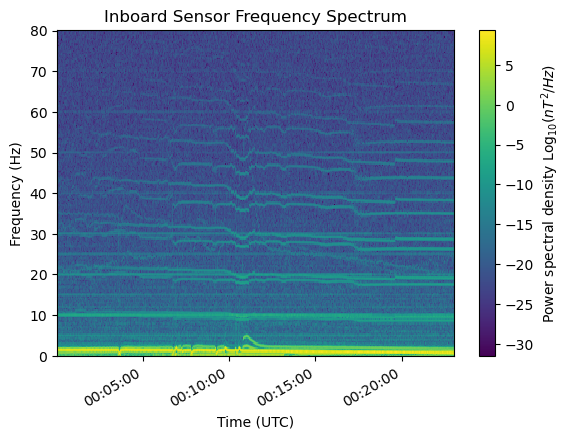

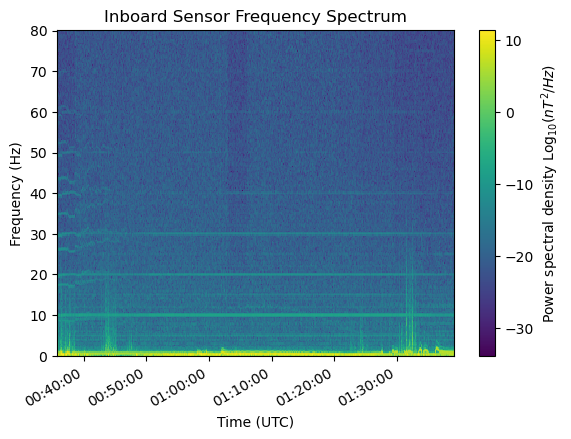

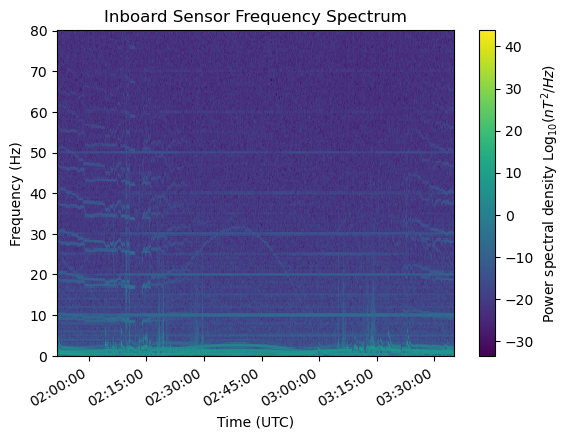

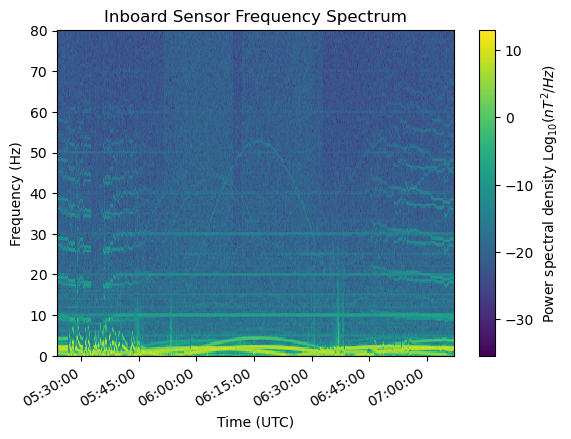

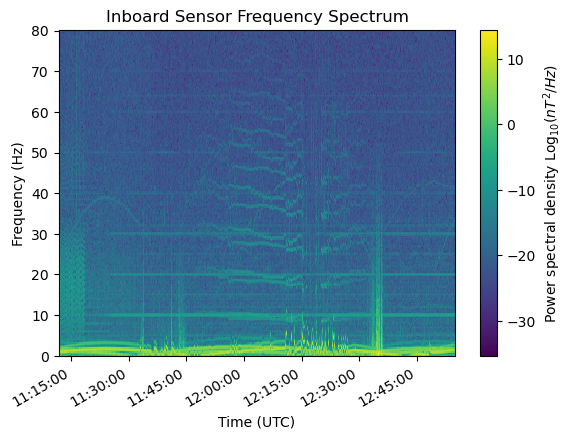

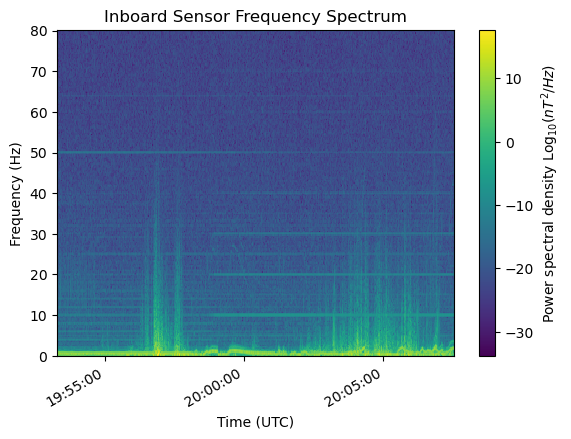

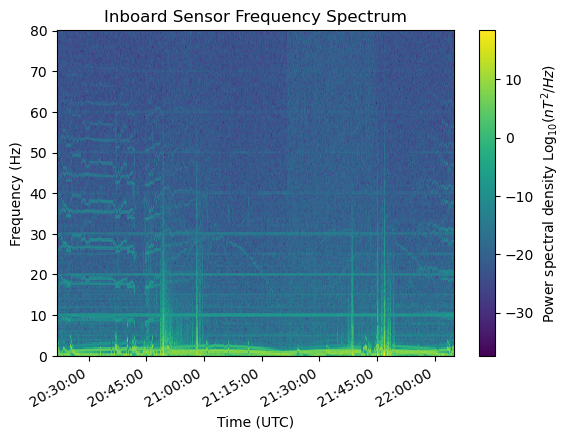

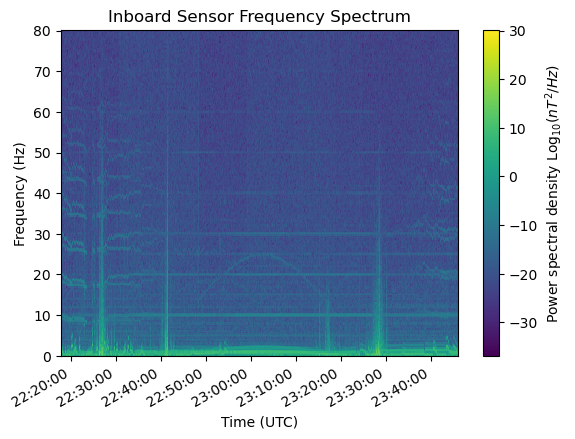

In [15]:
#window size for computing spectrogram 
nfft = 512                              
#overlap between subsequent windows
overlap = 256                           
#sampling frequency rate of MGF
Fs = 160                                

#for inboard spectrum
for i in range(len(MGF_lists)):
    FX,TX,PSDX,PSX,LSDX,LSX,ENBWX=spectrogram(MGF_lists[i]["B_inboard_CRF"].str[0],
                                                        MGF_lists[i]["timestamps"],
                                                        nfft,
                                                        overlap,
                                                        Fs)


    FY,TY,PSDY,PSY,LSDY,LSY,ENBWY=spectrogram(MGF_lists[i]["B_inboard_CRF"].str[1],
                                                        MGF_lists[i]["timestamps"],
                                                        nfft,
                                                        overlap,
                                                        Fs)


    FZ,TZ,PSDZ,PSZ,LSDZ,LSZ,ENBWZ=spectrogram(MGF_lists[i]["B_inboard_CRF"].str[2],
                                                        MGF_lists[i]["timestamps"],
                                                        nfft,
                                                        overlap,
                                                        Fs)

    PI = np.sqrt(PSDX**2 + PSDY**2 + PSDZ**2)
    PI = np.transpose(PI)

    #plotting the Spectrogram and formatting the plot
    plt.pcolormesh(TX, FX, 10*np.log10(np.sqrt(np.abs(PI))))
    plt.xlabel("Time (UTC)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label="Power spectral density Log$_{10}(nT^2/Hz)$")
    plt.title("Inboard Sensor Frequency Spectrum")

    #formatting datetime on plot
    plt.gcf().autofmt_xdate()                                       
    #the format in which the dates will be displayed
    myfmt = mdates.DateFormatter("%H:%M:%S")                     
    #setting the format on plot
    plt.gca().xaxis.set_major_formatter(myfmt) 
    plt.show()